<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 2*

---

# Text Vectorization & Documents Classification

# 🏆 학습목표

* 텍스트 문서를 벡터로 표현해 봅시다
* 유사도를 이용해 문서를 검색해 봅시다
* 텍스트에서 특성을 추출하고 문서 분류기를 만들 수 있습니다
* 잠재의미분석(Latent Semantic Analysis,LSA)을 수행합니다
* Spacy 단어 임베딩을 사용합니다

## Warm up

### TF-IDF

다음 동영상을 시청하세요.
- [TF-IDF](https://www.youtube.com/watch?v=meEchvkdB1U&feature=youtu.be)
  - TF스코어는 어떤 스코어 일까요? 
  - 왜 IDF 스코어를 추가로 고려할까요? 
  

### SVD
다음 동영상을 시청하세요.
- [특이값 분해(SVD)의 기하학적 의미와 활용 소개](https://youtu.be/cq5qlYtnLoY)
    - 우리는 SVD를 통해 무엇을 얻고자 하는 것일까요?



### TEXT 분류
다음 웹페이지를 읽어보세요. 
- [Text classification](https://developers.google.com/machine-learning/guides/text-classification)
    - Introduction
    - Step 1: Gather Data
    - Step 2: Explore Your Data
    - Step 2.5: Choose a Model
    - Step 3: Prepare Your Data

전체적인 시각을 늘리는 것이 중요합니다. 
<br> 페이지를 모두 이해해도 좋겠지만, 내가 앞으로 해나갈 일들을 멀리서 바라볼 수 있도록 준비해봅시다.

---



## 텍스트 문서를 벡터로 표현해 봅시다

머신러닝 모델에서 텍스트를 사용하기 위해서는 텍스트 데이터를 벡터화해야 합니다. 이것은 텍스트를 컴퓨터가 사용할 수 있게 수치정보로 변환하는 것으로 생각할 수 있습니다. 지난 시간 단어들을 토큰화 했다면, 토큰화한 정보들을 컴퓨터의 언어체계 속으로 넣어준다는 개념으로 받아들이면 됩니다. 

Bag-of-Words(BoW) 개념은 우리가 사용하는 언어모델을 단순화 시킨 모델입니다. 문서, 문장들에서 문법, 즉 어떤 단어들의 순서 등의 개념을 제거하고 단순히 **단어들의 빈도**만 고려하는 모델입니다.

BoW는 문서를 토큰화한 후 토큰의 빈도를 기반으로 벡터화 합니다. 데이터프레임 형태로 보자면 행은 각 문서가 되고 열은 중복되지 않는 각 단어가 됩니다. 열에는 단순히 각 단어가 문서에 얼마나 존재하는지를 카운트한 값을 넣거나(*CountVectorizer* 사용) TF-IDF 값이 오게 할 수 있습니다(*TfidfVectorizer 사용).

벡터 표현은 파이썬에서는 `sklearn`, `spacy`패키지를 사용해 구현할 수 있습니다.

### BBC Dataset

이번 세션에서는 BBC에서 제공하는 데이터셋을 사용하여 텍스트를 다뤄볼 예정입니다. BBC 웹사이트를 방문하는 고객이 방금 읽은 뉴스(문서)를 기반으로 비슷한 다른 문서를 적절하게 추천하게 만들 수 있으면 좋겠죠. 그런 작업을 한번 시작해 봅니다. 

* 아래 링크에서 파일을 다운로드 받아 노트 폴더에서 압축을 해제합니다. <br> data folder가 생성되고 001.txt ~ 401.txt 파일이 있는지 확인합니다.
* colab 유저들은 업로드 코드를 이용하여 업로드 후 unzip하여 파일을 풀면 사용할 수 있습니다.

* [bbc_fulltext.zip](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/bbc_fulltext/bbc_fulltext.zip)


* 레퍼런스 - [BBC News Tech]('https://www.bbc.com/news/technology')
, D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006. [논문링크](http://mlg.ucd.ie/datasets/bbc.html)

In [ ]:
# for Colab User
# Upload files
from google.colab import files
uploaded = files.upload()
!unzip "bbc_fulltext.zip" # 업로드 이름이 다르다면 수정해서 사용하세요.

In [6]:
# data 폴더가 제대로 생성되었는 지 확인합니다. 
!ls

bbc_fulltext.zip  data	sample_data


BoW를 사용해 Document Term Matrices(DTM, 문서-단어행렬)을 만들어 보겠습니다. 각 행은 문서를 나타내고 각 열은 단어를 나타냅니다.
- 각 셀의 값은 여러가지 방법으로 표현될 수 있는데
    - 단어의 출현 빈도를 나타내거나,
    - 단순히 단어의 존재 유무(binary)를 표현할 수 있고,
    - TF-IDF 값으로 나타낼 수 있습니다.

### spacy 예제
**Spacy로 텍스트에서 토큰을 추출해 보겠습니다.**

In [1]:
# 모듈에서 사용할 라이브러리와 spacy 모델을 불러옵니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
# 예제로 사용할 Text를 선언합니다. 
text = "In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today. A survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries use tf–idf."

In [3]:
# spacy의 언어모델을 이용하여 token화된 단어들을 확인합니다. 
doc = nlp(text)
print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['information', 'retrieval', 'tf', 'idf', 'TFIDF', 'short', 'term', 'frequency', 'inverse', 'document', 'frequency', 'numerical', 'statistic', 'intend', 'reflect', 'important', 'word', 'document', 'collection', 'corpus', 'weight', 'factor', 'search', 'information', 'retrieval', 'text', 'mining', 'user', 'modeling', 'tf', 'idf', 'value', 'increase', 'proportionally', 'number', 'time', 'word', 'appear', 'document', 'offset', 'number', 'document', 'corpus', 'contain', 'word', 'help', 'adjust', 'fact', 'word', 'appear', 'frequently', 'general', 'tf', 'idf', 'popular', 'term', 'weight', 'scheme', 'today', 'survey', 'conduct', '2015', 'show', '83', 'text', 'base', 'recommender', 'system', 'digital', 'library', 'use', 'tf', 'idf']


#### BBC Dataset에 적용

데이터를 축적하는 함수를 제작합니다.

In [4]:
# BBC 데이터를 불러오기 위한 함수
import os 

def gather_data(filefolder):
    """ 폴더 내 텍스트 파일을 각각 리스트 요소에 저장하는 함수
    Args:
        filefolder (str): .txt 파일이 존재하는 경로
    Returns:
        문서를 요소로하는 리스트
    """
    
    data = []
    files = os.listdir(filefolder)
    for article in files: 
        path = os.path.join(filefolder, article)
        # txt로 끝나는 파일만 읽습니다
        if  path[-3:] == 'txt':
            # rb:Read the file in Binary mode
            with open(path, 'rb') as f:
                data.append(f.read())
    
    return data

In [7]:
data = gather_data('./data')

In [8]:
# 샘플 확인
data[0]

b'Joke e-mail virus tricks users\n\nA virus that disguises itself as a joke is spreading rapidly across the net.\n\nAnti-virus firms are issuing high-level warnings about the new version of the Bagle e-mail program that seems to be catching a lot of people out. The Windows virus grabs e-mail addresses from Microsoft Outlook and uses its own mail sending software to spread itself to new victims. When it infects a machine, the Bagle variant turns off security measures that usually protect PCs.\n\nThe new variant is called Bagle.AT, Bagle.BB and Bagle.AU and the attachment bearing the virus code is labelled as either "joke" or "price".\n\nThe body of the virus usually contains nothing but a smiley or emoticon. The virus can strike computers running Windows 95, 98, ME, NT, 2000 and XP. Users will be infected if they open the attachment that travels with the e-mail. As well as plundering Microsoft Outlook for e-mail addresses to send itself to, Bagle.AT also tries to turn off the firewall a

문서별 단어의 수 분포도를 그려봅니다

In [9]:
import seaborn as sns
# plot 스타일과 폰트 크기를 설정합니다.
sns.set(style='whitegrid', font_scale=1.15)

# 문서별 단어의 수 분포도 그리는 함수
def plot_text_length_dist(text_list):

    # 문장이 요소인 리스트를 받아 각 문서의 단어 수를 가진 리스트를 만듭니다
    num_words = [len(doc.split()) for doc in text_list]
    
    sns.displot(num_words)
    plt.title('# of words per documents')
    plt.xlabel('Number of words')
    plt.ylabel('Number of documents')
    plt.show()       

대략 500 단어 정도로 표현된 문서가 가장 많이 보입니다.

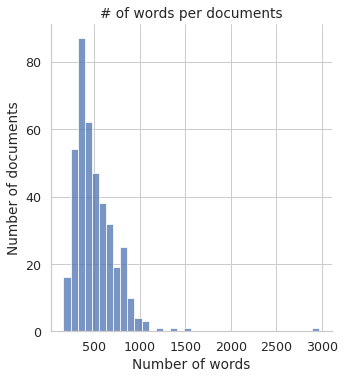

In [10]:
plot_text_length_dist(data)

### CountVectorizer 예제
: 단어들의 출현 빈도로 여러개의 문서를 벡터화하는 함수 <br>
: 모든 문자를 소문자로 전환하여 계산함

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# wiki 문장들을 리스트에 나누어 입력해봅니다. 
text = ["In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus."
,"It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling."
,"The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general."
,"tf–idf is one of the most popular term-weighting schemes today."
,"A survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries use tf–idf."]

# CountVectorizer 생성
vect = CountVectorizer()

# text를 기반으로 어휘 사전을 생성
vect.fit(text) 
# vect.fit(data[:5])

# text를 DTM(document-term matrix)으로 변환(transform)
dtm = vect.transform(text)
# dtm = vect.transform(data[:5])

vocabulary(모든 토큰)와 맵핑된 인덱스 정보를 확인할 수 있습니다

In [ ]:
vect.vocabulary_

In [ ]:
dtm.shape

(5, 75)

추출된 토큰을 나열해 봅니다.

In [ ]:
print(vect.get_feature_names())

['2015', '83', 'adjust', 'and', 'appear', 'appears', 'as', 'based', 'by', 'collection', 'conducted', 'contain', 'corpus', 'digital', 'document', 'documents', 'fact', 'factor', 'for', 'frequency', 'frequently', 'general', 'helps', 'how', 'idf', 'important', 'in', 'increases', 'information', 'intended', 'inverse', 'is', 'it', 'libraries', 'mining', 'modeling', 'more', 'most', 'number', 'numerical', 'of', 'offset', 'often', 'one', 'or', 'popular', 'proportionally', 'recommender', 'reflect', 'retrieval', 'schemes', 'searches', 'short', 'showed', 'some', 'statistic', 'survey', 'systems', 'term', 'text', 'tf', 'tfidf', 'that', 'the', 'times', 'to', 'today', 'use', 'used', 'user', 'value', 'weighting', 'which', 'word', 'words']


In [ ]:
text[2]

b'Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain\'s first mobile phone call was made across the Vodafone network on 1 January 1985 by veteran comedian Ernie Wise. In the 20 years since that day, mobile phones have become an integral part of modern life and now almost 90% of Britons own a handset. Mobiles have become so popular that many people use their handset as their only phone and rarely use a landline.\n\nThe first ever call over a portable phone was made in 1973 in New York but it took 10 years for the first commercial mobile service to be launched. The UK was not far behind the rest of the world in setting up networks in 1985 that let people make calls while they walked. The first call was made from St Katherine\'s dock to Vodafone\'s head office in Newbury which at the time was over a curry house. For the first nine days of 1985 Vodafone was the only firm with a mobile network in the UK. Then on 10 Janu

dtm의 타입을 보면 compressed sparse Row matrix임을 알 수 있습니다. <br> csr: Compressed Sparse Row matrix, sparse matrix 형태에서 0을 표현하지 않습니다.

In [ ]:
# CountVectorizer 로 제작한 dtm을 분석
type(dtm)

scipy.sparse.csr.csr_matrix

In [ ]:
# (row, column)  count
print(dtm)

0을 표현한 형태로 만들면 .todense를 사용할 수 있고, 이런경우 numpy.matrix형태가 됩니다. 

In [ ]:
# Return a dense matrix representation
# dtm.todense()
print(type(dtm))
print(type(dtm.todense()))
dtm.todense()

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>


데이터프레임 형태로 결과를 보고 싶다면

In [ ]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(type(dtm))
dtm

<class 'pandas.core.frame.DataFrame'>


,2015,83,adjust,and,appear,appears,as,based,by,collection,conducted,contain,corpus,digital,document,documents,fact,factor,for,frequency,frequently,general,helps,how,idf,important,in,increases,information,intended,inverse,is,it,libraries,mining,modeling,more,most,number,numerical,of,offset,often,one,or,popular,proportionally,recommender,reflect,retrieval,schemes,searches,short,showed,some,statistic,survey,systems,term,text,tf,tfidf,that,the,times,to,today,use,used,user,value,weighting,which,word,words
0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0,1,2,0,0,0,1,1,1,2,0,1,1,1,3,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,2,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
2,0,0,1,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,0,1,1,1,0,1,0,3,1,0,0,0,1,0,0,0,0,1,0,2,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,7,1,2,0,0,0,0,1,0,1,2,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0


세번째 문장과, dtm을 비교해 보겠습니다. 

In [ ]:
text[2]

'The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.'

#### BBC dataset에 적용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

## stop_words = 'english' 영어에 해당하는 불용어 처리를 합니다.
## max_features=n, 빈도 순서대로 top n 단어만 사용합니다.
vect = CountVectorizer(stop_words='english'
                       , max_features=10000)
# fit & transform
dtm = vect.fit_transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.shape

(401, 10000)

In [ ]:
dtm.head()

,00,000,000s,0051,007,01,028,04m,05,0530,056,0630,080,0800,0870,10,100,1000,100m,100s,101,102,104,106,106cm,1080,10cm,10m,10s,10th,10x7in,11,110,115,117,11b,11m,12,120,120bn,...,yeob,yepp,yes,yesterday,yeun,yh,yle,yoda,yoga,yonca,yoran,york,yorker,young,younger,youngsters,youth,yuppy,yusuf,zafi,zander,zar,zdnet,zealous,zed,zelda,zen,zenith,zens,zero,zhang,zip,zodiac,zombie,zombies,zone,zonealarm,zones,zoom,zooms
0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TfidfVectorizer 예제

Term Frequency - Inverse Document Frequency ([TF-IDF](https://mungingdata.wordpress.com/2017/11/25/episode-1-using-tf-idf-to-identify-the-signal-from-the-noise/), 단어빈도-역문서빈도)


Warmup 보았던 영상의 내용을 정리해봅시다. 

-  TF(Term Frequency, 단어의 빈도) : 문서에서 단어가 많이 등장하는 지를 수치화한 중요도 스코어(score)
 <br> **특정 문서 d에서 특정 단어 t가 쓰인 빈도**:

$\large tf(t,d) = \frac{Term\; t\; frequency\; in\; document}{Total\; words\; in\; document}$

`ex) "A new car, used car, car reivew" `
  - TF score :  A($1 \over 7$), new($1 \over 7$), car($3 \over 7$), used($1 \over 7$), reivew($1 \over 7$)  
  - IDF - $log {(총 \space 문장 \space 개수) \over {(단어가 \space 출현한 \space 문장의 \space 개수)}}$
  $\large idf(t) = log(\frac{n}{1+df(t)})$
<br></br>
  
`ex) 'A'가 모든 문장에서 등장 IDF = log(N/N) = 0`<br>

- TF-IDF Score 
<br> $ = \large tf(t,d) \times idf(t)$
  <br> (t=단어, d=문서, n=총 문서수*)

`ex) TF-IDF score = TF * IDF = (1/7) * 0 = 0`


TF-IDF 를 사용하는 이유는 문서를 구분하는데 어떤 단어가 중요한지(**unique**) 찾는 것 입니다.

수식을 살펴보면, 
<br> 여러 문서에서 많이 등장하는 단어일 수록 중요도가 낮다고 판단하며(IDF), <br> 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다(TF).

TF-IDF를 통한 자연어 처리는 간단하고 빠르게 구현할 수 있으므로 좋은 Baseline으로 사용할 수 있습니다.

#### TF-IDF vs Count vectorizer 


[1] TF-IDF(Tfidf) vectorizer를 생성하고 dtm을 만들어 보겠습니다.

In [ ]:
# TF-IDF vectorizer. 테이블을 작게 만들기 위해 max_features=15로 제한하였습니다.
tfidf = TfidfVectorizer(stop_words='english', max_features=15)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm = tfidf.fit_transform(text)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm

,corpus,document,frequency,idf,information,number,recommender,reflect,retrieval,searches,term,text,tf,weighting,word
0,0.237982,0.475965,0.589946,0.166183,0.237982,0.000000,0.000000,0.294973,0.237982,0.000000,0.237982,0.000000,0.166183,0.000000,0.237982
1,0.000000,0.000000,0.000000,0.000000,0.425001,0.000000,0.000000,0.000000,0.425001,0.526778,0.000000,0.425001,0.000000,0.425001,0.000000
2,0.276074,0.276074,0.000000,0.192782,0.000000,0.684374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.192782,0.000000,0.552149
3,0.000000,0.000000,0.000000,0.404837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.579748,0.000000,0.404837,0.579748,0.000000
4,0.000000,0.000000,0.000000,0.372642,0.000000,0.000000,0.661438,0.000000,0.000000,0.000000,0.000000,0.533644,0.372642,0.000000,0.000000


[2] 같은 파라미터로 CountVectorizer를 사용해 tfidf 결과와 비교해 보겠습니다.

In [ ]:
vect = CountVectorizer(stop_words='english', max_features=15)
dtm = vect.fit_transform(text)
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,corpus,document,frequency,idf,information,number,recommender,reflect,retrieval,searches,term,text,tf,weighting,word
0,1,2,2,1,1,0,0,1,1,0,1,0,1,0,1
1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
2,1,1,0,1,0,2,0,0,0,0,0,0,1,0,2
3,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
4,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0


#### BBC Dataset에 적용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
dtm = tfidf.fit_transform(data)
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,000,10,100,101,104,10m,11,12,120,13,130,14,149,15,150,16,167,17,17m,18,19,1980s,1982,1983,1985,1990s,1993,1994,1995,1bn,1m,20,200,2000,2001,2002,2003,2004,2005,2006,...,worry,worrying,worse,worst,worth,worthwhile,wouldn,wow,wright,wristwatch,write,writer,writers,writing,written,wrong,wrongful,wrote,wsis,x1,xbox,xenon,xp,xxx,yahoo,yang,year,years,yen,yes,yoda,yoran,york,young,younger,youngsters,youth,zafi,zen,zombies
0,0.026072,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.051915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102341,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.066212,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.034386,0.079190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.087326,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.027346,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.028192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.028940,0.066646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045824,0.0,0.0,0.0,0.073493,0.241386,0.0,0.071006,0.067081,0.0,0.0,0.0,0.122338,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.123824,0.0,0.0,0.0,0.0,0.05528,0.058505,0.0,0.0,0.0,0.0,0.0,0.0


#### 파라미터 튜닝

> 이번에는 조금 더 파라미터를 튜닝하고, spacy tokenizer 를 사용해서 벡터화를 진행해 보겠습니다.




In [ ]:
# spacy tokenizer 함수
def tokenize(document):
    
    doc = nlp(document)
    # punctuations: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

파라미터 튜닝을 더 해보겠습니다. 여러 파라미터들을 변경해 가며 결과를 비교해 보십시오.

In [ ]:
# ngram_range = (min_n, max_n), min_n 개~ max_n 개를 갖는 n-gram(n개의 연속적인 토큰)을 토큰으로 사용합니다.
# min_df = n, 최소 n개의 문서에 나타나는 토큰만 사용합니다
# max_df = .7, 70% 이상 문서에 나타나는 토큰은 제거합니다
tfidf = TfidfVectorizer(stop_words='english'
                        ,tokenizer=tokenize
                        ,ngram_range=(1,2)
                        ,max_df=.7
                        ,min_df=3
#                         ,max_features = 4000
                       )

dtm = tfidf.fit_transform(data)
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

,-PRON-,abandon,ability,ability record,able,able access,able choose,able control,able handle,able offer,able play,able store,able thing,able use,able watch,absolutely,absorb,abuse,academic,academy,accept,acceptable,acceptance,access,access available,access datum,access device,access e,access grow,access home,access information,access internet,access medium,access mobile,access net,access point,access service,accessible,accident,acclaim,...,year launch,year microsoft,year million,year motorola,year new,year number,year old,year people,year portable,year predict,year real,year release,year report,year say,year service,year think,year time,year uk,year use,year year,yen,yepp,yes,york,york base,york state,york times,young,young americans,young people,young user,youngster,youth,zelda,zen,zen micro,zombie,zombie bot,zone,zoom
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068952,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.024268,0.0,0.017571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069914,0.0,0.0,0.0,0.0,0.052588,0.0,0.0,0.0,0.049556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dtm.shape

(401, 7604)

## 유사도를 이용해 문서를 검색해 봅시다

네이버, 구글과 같은 검색엔진의 원리는 무엇입니까? 
<br> 검색어를 인터넷에 존재하는 여러 문서들과 단순히 같은지만 비교 하는것은 아닙니다. 쿼리와 문서들을 매칭(matching) 하는 방법은 여러가지가 있습니다. 그중 가장 클래식한 방법인 "유사도 측정 방법"을 시도해 봅니다. 
<br> 이를 위해 n-차원 거리를 사용하는 방법을 살펴보겠습니다.

### 코사인 유사도(Cosine Similarity, Brute Force 방법)

$\Large similarity=cos(Θ)=\frac{A⋅B}{||A||\ ||B||}=\frac{\sum_{i=1}^{n}{A_{i}×B_{i}}}{\sqrt{\sum_{i=1}^{n}(A_{i})^2}×\sqrt{\sum_{i=1}^{n}(B_{i})^2}}$

<img align="center" src="https://images.deepai.org/glossary-terms/cosine-similarity-1007790.jpg" width=700 title="Cosine Similarity" alt="https://deepai.org/machine-learning-glossary-and-terms/cosine-similarity">


코사인 유사도는 두 벡터(문서벡터) 간의 각의 코사인 값을 이용하여 구할 수 있는 유사도 입니다.
- 두 벡터(문서)가 
    - 완전히 같을 경우 1이며
    - 90도의 각을 이루면 0
    - 완전히 반대방향을 이루면 -1 입니다

#### TF-IDF 벡터 거리
TF-IDF 벡터들의 거리를 계산해 보겠습니다
[sklearn.metrics.pairwise.cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn-metrics-pairwise-cosine-similarity)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# input, X:(n_samples_X, n_features)
distance_matrix  = cosine_similarity(dtm)

In [ ]:
df = pd.DataFrame(distance_matrix)

유사도는 문서 x 문서 행렬로 표현됩니다

In [ ]:
df.shape

(401, 401)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400
0,1.000000,0.014998,0.041514,0.035916,0.011299,0.021492,0.008861,0.019746,0.308156,0.019956,0.027771,0.020529,0.007588,0.045374,0.019767,0.047641,0.017975,0.019942,0.018530,0.034216,0.015849,0.055570,0.021976,0.035695,0.024257,0.012487,0.009431,0.028583,0.033699,0.031327,0.041125,0.023959,0.346372,0.097859,0.012726,0.020045,0.014379,0.030776,0.372439,0.210640,...,0.050091,0.035916,0.007387,0.291799,0.014685,0.031490,0.021084,0.118558,0.064996,0.021972,0.021492,0.080722,0.024713,0.024085,0.013938,0.018448,0.634388,0.030939,0.017447,0.014625,0.021464,0.038563,0.008291,0.052448,0.041029,0.026842,0.025648,0.005956,0.040467,0.034726,0.162121,0.229296,0.011844,0.018227,0.028107,0.011830,0.019738,0.013596,0.009184,0.052448
1,0.014998,1.000000,0.024811,0.036935,0.029222,0.221671,0.031656,0.036121,0.025296,0.043338,0.028627,0.040830,0.039587,0.039457,0.041103,0.022156,0.024584,0.036916,0.018690,0.085091,0.012136,0.016791,0.054708,0.042296,0.028373,0.190720,0.112254,0.009806,0.014573,0.021385,0.040554,0.054340,0.017043,0.037784,0.033729,0.032849,0.040577,0.077081,0.032485,0.028017,...,0.047781,0.036935,0.066005,0.054850,0.017615,0.036496,0.023888,0.055365,0.031680,0.057967,0.221671,0.068739,0.078008,0.025764,0.077448,0.037202,0.025191,0.020430,0.050165,0.049785,0.044212,0.019053,0.032681,0.022416,0.024362,0.037098,0.017768,0.038760,0.022998,0.019019,0.015845,0.012626,0.022334,0.019251,0.042788,0.016940,0.052463,0.032662,0.037820,0.022416
2,0.041514,0.024811,1.000000,0.026519,0.102332,0.030127,0.022638,0.019852,0.040847,0.024582,0.021479,0.012252,0.020282,0.044144,0.017505,0.032934,0.010031,0.034399,0.056063,0.050406,0.009653,0.013851,0.053768,0.027988,0.043993,0.039948,0.026018,0.010103,0.016034,0.027391,0.305195,0.009918,0.035028,0.036705,0.014177,0.027256,0.047349,0.033202,0.042810,0.051493,...,0.056372,0.026519,0.001741,0.022204,0.010895,0.039594,0.026958,0.025563,0.049380,0.068558,0.030127,0.063957,0.027046,0.130258,0.008647,0.086470,0.038239,0.018313,0.030108,0.038741,0.009442,0.015001,0.018815,0.025128,0.037379,0.039582,0.014557,0.018246,0.024711,0.094204,0.006628,0.040698,0.008616,0.019255,0.021837,0.097403,0.033770,0.058408,0.055404,0.025128
3,0.035916,0.036935,0.026519,1.000000,0.033863,0.035101,0.024513,0.044580,0.056627,0.041961,0.027201,0.028365,0.025973,0.047236,0.035606,0.036020,0.028055,0.027350,0.012107,0.041708,0.130271,0.036489,0.045174,0.073751,0.070594,0.056464,0.048537,0.026928,0.010123,0.017588,0.074734,0.022392,0.014626,0.085479,0.023353,0.036605,0.043523,0.071219,0.054669,0.030636,...,0.088916,1.000000,0.024633,0.064317,0.026145,0.080492,0.032622,0.061752,0.078756,0.058491,0.035101,0.030452,0.054023,0.023876,0.034721,0.037571,0.021993,0.419053,0.039765,0.033855,0.049457,0.096033,0.011827,0.044153,0.028183,0.046056,0.029091,0.019028,0.288912,0.023389,0.054317,0.050017,0.029934,0.021308,0.052214,0.017941,0.028565,0.032798,0.035675,0.044153
4,0.011299,0.029222,0.102332,0.033863,1.000000,0.015927,0.021267,0.042578,0.017994,0.037723,0.019082,0.037993,0.024628,0.025644,0.026537,0.044846,0.018199,0.040985,0.214319,0.043961,0.029113,0.004304,0.070805,0.046170,0.013404,0.030189,0.035723,0.034755,0.040293,0.025615,0.023515,0.022184,0.008476,0.032747,0.014660,0.014011,0.183162,0.079023,0.075975,0.020922,...,0.046772,0.033863,0.022562,0.041920,0.017766,0.023313,0.013541,0.068659,0.022806,0.235065,0.015927,0.215408,0.066968,0.367712,0.011235,0.040682,0.010589,0.042264,0.067912,0.051215,0.055502,0.032859,0.024812,0.010446,0.098037,0.100497,0.051738,0.036786,0.026930,0.186684,0.036569,0.010800,0.018684,0.021447,0.054540,0.327685,0.040275,0.174066,0.245809,0.010446


#### 문서간 유사도 측정
문서0과 문서0은 같으므로 유사도가 1입니다. 문서0과 문서1~4 와의의 유사도를 확인해 보세요.

In [ ]:
df[0][:5]

0    1.000000
1    0.014998
2    0.041514
3    0.035916
4    0.011299
Name: 0, dtype: float64

#### 유사도를 이용한 정렬

문서0과 유사도가 큰 문서를 순서대로 정렬해서 살펴보겠습니다 (TF-IDF vectorization 방법에 따라 많이 다를 수 있습니다)

In [ ]:
ind = df[df[0] < 1][0].sort_values(ascending=False)[:5]
ind

377    0.634388
301    0.634388
222    0.595379
38     0.372439
32     0.346372
Name: 0, dtype: float64

In [ ]:
index = 377

In [ ]:
print(data[0][:100])
print(data[index][:100])

b'Joke e-mail virus tricks users\n\nA virus that disguises itself as a joke is spreading rapidly across '
b'Virus poses as Christmas e-mail\n\nSecurity firms are warning about a Windows virus disguising itself '


코사인 유사도와 같은 Brute Force 방법은 비교해야 할 문서의 양이 많아 질 수록 많은 계산을 필요로합니다. <br> 실제 어플리케이션 환경에서는 더 빠른 비교 방법을 사용해야 합니다.

### NearestNeighbor (K-NN, K-최근접 이웃) 

K-최근접 이웃법은 쿼리와 가장 가까운 상위 K개의 근접한 데이터를 찾아서 K개 데이터의 유사성을 기반으로 **점을 추정하거나 분류**하는 예측 분석에 사용됩니다.
최근접 이웃 방법은 non-generalizing 머신러닝 방법인데, 모든 학습 데이터를 KD Tree 나 Ball Tree같은 빠른 색인 구조(indexing structure)에 단순히 저장하기 때문입니다.




[K-D Tree](https://scikit-learn.org/stable/modules/neighbors.html?highlight=very%20distant%20from%20point#k-d-tree)의 기본아이디어는 점 A와 B가 멀고, B가 C와 가까우면 A가 C와 멀다는 것을 알 수 있는데 이때 명시적으로 A와 C의 거리를 계산할 필요가 없다는 것입니다.

<img src="https://i.imgur.com/CKKoz5W.png" width="500"/>

[Ball Tree](https://scikit-learn.org/stable/modules/neighbors.html?highlight=very%20distant%20from%20point#ball-tree)는 K-D 트리를 더욱 효율적으로 만들기 위해 개발되었습니다. KD 트리는 데이터를 Cartesian 축으로 분할하지만 Ball Tree는 nesting hyper-spheres 형태로 분할하여 트리구성에 비용이 더 들지만, 매우 구조화된 데이터나 높은 차원의 데이터에 더 효율적입니다.

In [ ]:
dtm.head()

,-PRON-,abandon,ability,ability record,able,able access,able choose,able control,able handle,able offer,able play,able store,able thing,able use,able watch,absolutely,absorb,abuse,academic,academy,accept,acceptable,acceptance,access,access available,access datum,access device,access e,access grow,access home,access information,access internet,access medium,access mobile,access net,access point,access service,accessible,accident,acclaim,...,year launch,year microsoft,year million,year motorola,year new,year number,year old,year people,year portable,year predict,year real,year release,year report,year say,year service,year think,year time,year uk,year use,year year,yen,yepp,yes,york,york base,york state,york times,young,young americans,young people,young user,youngster,youth,zelda,zen,zen micro,zombie,zombie bot,zone,zoom
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068952,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.024268,0.0,0.017571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069914,0.0,0.0,0.0,0.0,0.052588,0.0,0.0,0.0,0.049556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### sklearn - NearestNeighbors
sklearn에서 비지도학습을 위한 NearestNeighbors 모델을 사용합니다
[sklearn.neighbors.NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn-neighbors-nearestneighbors)

In [ ]:
from sklearn.neighbors import NearestNeighbors

# dtm을 사용히 NN 모델을 학습시킵니다. (디폴트)최근접 5 이웃.
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

문서0과 가장 가까운 문서 (0 포함) 5개의 거리(값이 작을수록 유사합니다)와, 문서의 인덱스를 알 수 있습니다

In [ ]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 0.85511637, 0.85511637, 0.89957864, 1.12032242]]),
 array([[  0, 377, 301, 222,  38]]))

문서0의 이웃인 문서377로 검색해 보겠습니다 

In [ ]:
nn.kneighbors([dtm.iloc[377]])

(array([[0.        , 0.        , 0.85511637, 0.91629024, 1.10942847]]),
 array([[377, 301,   0, 222,  38]]))

In [ ]:
print(data[222][:300])
print(data[301][:300])

b'Toxic web links help virus spread\n\nVirus writers have begun using the power of the web to spread their malicious wares.\n\nA Windows virus called Bofra is turning infected machines into distributors of its malicious code. Those clicking on the poisoned links in e-mail messages sent out by infected mac'
b'Virus poses as Christmas e-mail\n\nSecurity firms are warning about a Windows virus disguising itself as an electronic Christmas card.\n\nThe Zafi.D virus translates the Christmas greeting on its subject line into the language of the person receiving infected e-mail. Anti-virus firms speculate that this'


#### 문서 검색 예제

CNN 에서 tech 기사를 가져와서 문서검색에 사용해봅시다. 다른 기사를 가지고 테스트해봐도 좋습니다. 

In [ ]:
# https://edition.cnn.com/2020/07/30/tech/huawei-samsung-q2-hnk-intl/index.html
cnn_tech_article = [ """
Hong Kong (CNN Business)Huawei became the world's top smartphone seller last quarter, overtaking Samsung for the first time ever, according to an independent market research report released Thursday.
The Chinese tech company shipped 55.8 million phones in the three months ended in June, surpassing longtime rival Samsung, which shipped 53.7 million, according to the Canalys report.
"Taking first place is very important for Huawei," said Canalys analyst Mo Jia. "It is desperate to showcase its brand strength to domestic consumers, component suppliers and developers."
A years-long US pressure campaign against Huawei has handicapped the Shenzhen-based firm's global business.
Huawei still suffered an annual decline in smartphone shipments of 5%. But Samsung's was a lot bigger at 30%, according to Canalys.
The market research firm said Huawei's victory over Samsung wouldn't have happened without Covid-19. The company was able to take advantage of the economic recovery in China, where Huawei now sells over 70% of its smartphones. Samsung has a very small presence in China.
Huawei&#39;s hopes of global domination have been dashed
Huawei's hopes of global domination have been dashed
Huawei's global smartphone and telecom gear business continues to suffer the fallout from US sanctions that cut the company off from key American tech and supplies.
Without access to popular Google (GOOGL GOOGLE) apps such as YouTube, maps and Gmail, Huawei's latest smartphones are a lot less attractive to international buyers. That will make it very difficult for Huawei to hold on to the global No. 1 position, according to Jia.
"It will be hard for Huawei to maintain its lead in the long term. Its major channel partners in key regions, such as Europe, are increasingly wary of ranging Huawei devices, taking on fewer models, and bringing in new brands to reduce risk. Strength in China alone will not be enough to sustain Huawei at the top once the global economy starts to recover," he said.
"Our business has demonstrated exceptional resilience in these difficult times," Huawei spokeswoman Evita Cao said. Cao did not respond to questions on how the company can maintain its lead going forward.
Huawei's victory came on the same day Samsung posted a big profit bump for the second quarter, with strong chip demand helping the company weather the fallout from the coronavirus pandemic.
Samsung reported operating profit of 8.15 trillion won ($6.8 billion) for the three months that ended in June, up more than 23% compared to the same period last year.
Samsung said sales fell about 6% to 53 trillion won ($44.6 billion).
Shares in Samsung were last up 0.7% in Seoul. South Korea's Kospi (KOSPI) rose 0.1%.
Taiwan&#39;s TSMC is becoming one of the world&#39;s top companies. Intel&#39;s problems are helping
Taiwan's TSMC is becoming one of the world's top companies. Intel's problems are helping
Despite the double digit declines in annual smartphone shipments for the quarter noted by the Canalys report, Samsung reported that the unit remained profitable thanks to savings on marketing costs. (Samsung does not break out specifics about its smartphone shipments, but noted that they declined.)
For the second half of 2020, however, Samsung is warning that "uncertainties related to Covid-19 linger" for its mobile business.
That could be enough to drag the company to revenue losses for the year, according to research firm Crisp Idea.
The consumer electronics unit, which includes smartphones and TVs, is "expected to decline significantly as Covid-19 affects demand and leads to store and plant closures globally," Crisp Idea analysts wrote in a note earlier this month.
Smartphone shipments worldwide are expected to fall about 18% in the first half of the year as the pandemic continues to affect consumer spending, analysts at IDC said in a note last month.
The market research firm added that global smartphone shipments are not expected to return to growth until the first quarter of 2021.
That would also hurt Samsung's memory chip business, because the company supplies chips for rival smartphone companies such as Apple (AAPL) and Huawei."""]


CNN Tech 뉴스를 쿼리로 쓰기 위해 학습된 tfidf vectorizer를 통해 변환하겠습니다

In [ ]:
new = tfidf.transform(cnn_tech_article)

In [ ]:
nn.kneighbors(new.todense())

(array([[1.31624638, 1.3174223 , 1.31770469, 1.31778057, 1.31848904]]),
 array([[297, 218,  56, 374, 232]]))

In [ ]:
# 가장 가깝게 나온 문서를 확인합니다 
data[297]

b'Gadget growth fuels eco concerns\n\nTechnology firms and gadget lovers are being urged to think more about the environment when buying and disposing of the latest hi-tech products.\n\nAt the Consumer Electronics Show in Las Vegas earlier this month, several hi-tech firms were recognised for their strategies to help the environment. Ebay also announced the Rethink project bringing together Intel, Apple, and IBM among others to promote recycling. The US consumer electronics market is set to grow by over 11% in 2005. But more awareness is needed about how and where old gadgets can be recycled as well as how to be more energy efficient, said the US Environmental Protection Agency (EPA). Of particular growing concern is how much energy it takes to recharge portable devices, one of the fastest growing markets in technology. The Consumer Electronics Association (CEA) has predicted that shipments of consumer technologies in 2005 will reach more than $125.73 billion (nearly \xc2\xa368 billion

---

여러분은 이미 머신러닝을 이용해 분류기를 학습시킬 수 있습니다. 그리고 텍스트 문서에서 어떻게 특성들을 추출하는지 배웠습니다. 이제 텍스트 문서를 분류하는 모델을 만들 차례 입니다!

## 텍스트에서 특성들을 추출하고 문서 분류기를 만들어 보겠습니다.

Sklearn 파이프라인을 사용하면 머신러닝 프로세스에 사용되는 여러 컴포넌트들을 쉽게 연결할 수 있었습니다.

이번에는 파이프라인을 이용해 코퍼스 입력, 차원 축소, 학습 프로세스를 진행해 보겠습니다.

벡터화 과정중에 n-gram 범위, 최대 토큰의 수 같은 하이퍼파라미터들을 수정해 가며 실험을 해 보아야 합니다.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

20개 뉴스그룹으로 분류된 18,000개의 뉴스그룹 문서 데이터셋 입니다.
- [20newsgroups](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups)
- 전자와 정치에 관한 두 개의 다른 카테고리 뉴스를 가져오겠습니다.


In [17]:
categories = ['sci.electronics',
              'talk.politics.misc']

ng_train = fetch_20newsgroups(subset='train'
                             , remove=('headers', 'footers', 'quotes')
                             , categories=categories
                             )

ng_test = fetch_20newsgroups(subset='test'
                             , remove=('headers', 'footers', 'quotes')
                             , categories=categories
                             )

학습, 테스트 데이터가 분리되어 있습니다.

In [18]:
len(ng_train.data), len(ng_test.data)

(1056, 703)

한 문서를 확인해 보겠습니다.

In [19]:
ng_train.data[5]

"\nMight be a good idea...  The resolution you requested is about 0.3mV\nIn order to get what you've paid for, noise level better be lower than\nthat.  It is kind of hard to do it in a noisy box like you can expect\ninside a PC.\n\nBefore you pay $$$ for a PC card, test it out by sampling a low\ndistortion sine wave (I think there is a sine wave on a CD.  Digital\nDomain ?  There are possibly other low THD sources)  Run the digitized\nwaveform through a FFT transform and take alook at the noise floor on\nthe spectrum.  That's should give you a good indication of the design.\n(That's what I am doing to test a data acquistion system I have designed\n- I got the idea from MAXIM data sheet.)\n\nIf you can live with 14 bit resolution, I would recommend looking at\nthe MAX121 from MAXIM.  It is a high speed (308KHz) complete\nsampling A/D with DSP interface.  The input range is +/- 5V and it\nuses a serial interface (which can easily be optically isolated\nfrom the computer to elinimate a ma

이 문서의 타겟 레이블 입니다

In [20]:
ng_train.target[5]

0

In [21]:
ng_train.target_names

['sci.electronics', 'talk.politics.misc']

### 데이터를 살펴봅시다
- [Step 1: Gather Data](https://developers.google.com/machine-learning/guides/text-classification/step-1)

- [Step 2: Explore Your Data](https://developers.google.com/machine-learning/guides/text-classification/step-2)

학습 모델을 만드는 일은 데이터 분석 과정 중 한 부분입니다. 모델링 전 데이터의 특성을 확인하고 이해하는 과정을 통해 더욱 좋은 모델을 만들 수 있게 됩니다. 데이터를 미리 잘 살펴보면 더 적은 데이터로 더 높은 성능을 가진 모델을 만들 수도 있습니다.

- [explore_data.py](https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/explore_data.py) 파일은 ipynb 폴더에 다운받아 import 하여 사용하세요

- [Direct Download Link](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/explore_data.py)



In [12]:
# for Colab User
# Upload files
from google.colab import files
uploaded = files.upload()

Saving explore_data.py to explore_data.py


In [14]:
# 그냥 실핼하면 에러가 날 수 있습니다. 
# 위 'Direct Download Link'에서 explore_data를 다운받은 뒤 업로드해서 사용합니다. 
import explore_data as ed
import seaborn as sns

In [22]:
# Gets the median number of words per sample given corpus.
median_words_per_sample = ed.get_num_words_per_sample(ng_train.data)
print('Median words per sample: ', median_words_per_sample)

Median words per sample:  91.0


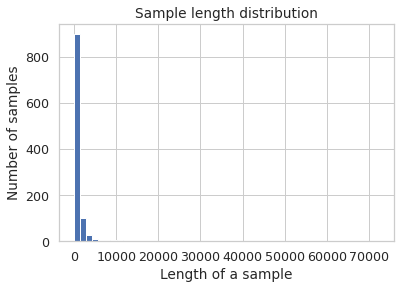

In [23]:
# 데이터 길이 확인
ed.plot_sample_length_distribution(ng_train.data)

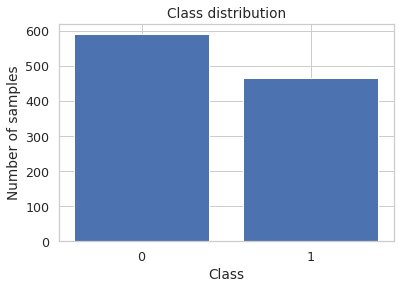

In [24]:
# 전자와 정치 두 카테고리 확인
ed.plot_class_distribution(ng_train.target)

In [31]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 4]

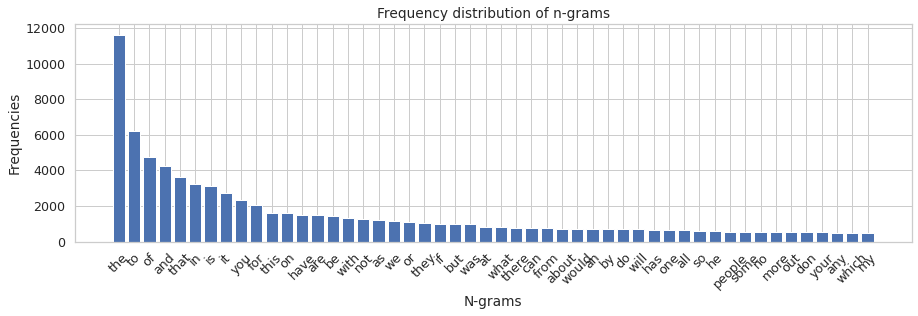

In [32]:
# Plots the frequency distribution of n-grams.
ed.plot_frequency_distribution_of_ngrams(ng_train.data
                                     , ngram_range=(1, 2)
                                     , num_ngrams=50)

### 모델은 어떻게 선택할까요? 
- [Step 2.5: Choose a Model](https://developers.google.com/machine-learning/guides/text-classification/step-2-5)

앞서 간단히 살펴본 데이터의 수치를 기반해서 2.5단계에서는 어떤 분류 모델을 사용할 것인지 선택을 해 보겠습니다.

다음 플로우차트에서 어떻게 분류 모델을 선택해야 하는지 구글에서 수행한 여러 실험 결과를 가지고 간략한 가이드를 제공합니다. 목표는 주어진 데이터세트에서 가능한 최선의 정확도를 낼 수 있고 동시에 학습계산량을 줄이는 것이었습니다. 최적의 방법을 찾기 위해 감성분석, 토픽 분류 등 여러 문제들에 대한 12개의 데이터 세트를 사용했으며 또한 여러 학습 모델구조를 사용해 45만번 이상의 실험을 수행하였습니다.

![flowchart](https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationFlowchart.png)

In [33]:
# S/W ratio를 계산해 봅시다, 구글 flowchar에 따르면,
# S/W < 1500 일 경우 BoW 를 사용해 벡터화 하고 simple MLP 모델 or 앙상블 모델을 사용하는것을 추천하고 있습니다.
sw_ratio = len(ng_train.data) / median_words_per_sample
print('number of samples / median words per sample ratio: ', int(sw_ratio))

number of samples / median words per sample ratio:  11


### TF-IDF 모델로 베이스라인을 만들어 봅시다

In [34]:
# 파이프라인 구성 요소를 만듭니다
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

In [35]:
import pandas as pd

# DTM을 생성합니다.
# fit_transform : Learn vocabulary and idf, return document-term matrix.
dtm = vect.fit_transform(ng_train.data) 

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.shape

(1056, 97372)

In [36]:
# 파이프라인을 정의합니다
pipe = Pipeline([
    ('vect',vect)
    ,('clf', rfc)
])
pipe

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [37]:
# 파라미터 셋팅
parameters = {
    'vect__max_df': (0.7, 1.0) # document frequency(%) 높을 경우 제거
    ,'vect__min_df': (2, 5, 10) # document frequency(횟수) 낮을 경우 제거
    ,'vect__max_features': (5000, 20000) # 코퍼스에서 term frequency 높은 순서대로 나열하여 제한
    ,'clf__n_estimators': (100, 500) # The number of trees in the forest.
    ,'clf__max_depth': (10, 20, None) # The maximum depth of the tree
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(ng_train.data, ng_train.target)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  7.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [38]:
grid_search.best_score_

0.9062460878118573

In [39]:
grid_search.best_params_

{'clf__max_depth': None,
 'clf__n_estimators': 500,
 'vect__max_df': 0.7,
 'vect__max_features': 20000,
 'vect__min_df': 2}

In [40]:
from sklearn.metrics import accuracy_score

# 테스트 데이터에 대해 정확도를 구해보겠습니다
y_test = grid_search.predict(ng_test.data)
accuracy_score(ng_test.target, y_test)

0.8947368421052632

## 잠재의미분석(Latent Semantic Analysis, LSA)


잠재의미분석(LSA)는 BoW방법론을 사용해 만든 문서-단어행렬(DTM) 같은 행렬 데이터의 차원을 축소해 문서들에 숨어있는(latent) 의미(Topics)를 끌어내는 방법입니다.

이때 차원 축소에는 Truncated SVD(특이값 분해)를 사용해 원하는 문서나, 단어의 차원을 축소합니다.

물론 차원이 축소가 되더라도 기존에 문서나, 단어들 간의 거리관계는 어느정도 보존이 됩니다.


<img src="https://www.researchgate.net/profile/Konstantinos_Bougiatiotis/publication/321025221/figure/fig9/AS:668660309962763@1536432449448/Singular-value-decomposition-followed-by-rank-lowering-for-latent-semantic-indexing.jpg" alt="Singular value decomposition followed by rank lowering for latent semantic indexing"/>

SVD를 사용해 행렬 $A$를 $U, Σ, V^{T}$ 세 행렬의 곱으로 분해(decomposion) 합니다.

> $A=UΣV^{T}$

여기서 $U$, $V$가 직교행렬(orthogonal matrix) 이고, $Σ$는 대각행렬로 대각성분이 특이값(singular value)입니다.

$U$, $V$가 직교행렬(orthogonal matrix)일 때 $UU^T=U^TU=I$, $VV^T=V^TV=I$ 관계가 성립하므로

> $AV=UΣ$  입니다

$U$ 와 $V^T$ 의 열 벡터는 특이벡터(singular vector)라 불리는데

Truncated SVD는 특이값(singular value, $Σ$ 대각성분) 가운데 가장 큰 k개만 남기고 해당 특이값에 대응하는 특이벡터들로 원래 행렬 A를 근사하는 방법입니다.

물론 0보다 큰 특이값을 제거하면 정보의 손실이 발생하므로 적당히 필요한 차원만큼 k를 선택합니다.

다음 그림에서 k값 선택에 따른 정보 손실을 확인할 수 있습니다.

<img src="https://i.imgur.com/Dica82I.png" width="600" />


행렬은 선형변환으로 볼 수 있으므로, $V$의 열벡터들을 $A$를 통해 선형변환하면 $Σ$의 특이값 만큼 크기가 변하면서 여전히 직교하는 $U$의 열벡터들을 얻을 수 있다는 것입니다.


여기서 만약 m개 문서, n개 단어로 이루어진 행렬을 truncated SVD로 분해해 다음과 같은 분해를 수행 했다면 다음과 같은 근사 식을 얻을 것이며

$$A_k=U_kΣ_kV^{T}_k$$

$U_k$와 $V_k$를 사용해 n차원으로 표현 되었던 문서를 k차원으로, 또는 m 차원으로 표현되었던 단어를 k 차원으로 표현할 수 있게 됩니다.


#### TruncatedSVD 를 사용하여 파이프라인에서 차원을 축소하고 분류문제를 풀어보겠습니다.

In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

# SVD를 사용한 차원 축소
from sklearn.decomposition import TruncatedSVD

vect = TfidfVectorizer(stop_words='english'
                       , ngram_range=(1,2)
                       , min_df=2
                       , max_df=0.7
                       , token_pattern=r'(?u)\b\w[A-Za-z]+\b' # 영문자만 사용
                       , max_features=10000
                      )

svd = TruncatedSVD(algorithm='randomized'
                   , n_iter=5
                   , random_state=2)

rfc = RandomForestClassifier(n_estimators=500, random_state=2)

In [ ]:
params = {
    # 100~500 사이의 정수 크기로 차원을 줄입니다
#     'svd__n_components': stats.randint(100, 500)
    'svd__n_components': stats.randint(2, 3) # 문서의 차원을 2로 고정
    
}

In [ ]:
# 1.Tfidf 문서 벡터화, 2. svd 차원축소, 3. 랜덤포레스트 분류기
pipe = Pipeline([
    ('vect', vect)
    , ('svd', svd)
    , ('clf', rfc)
])

In [ ]:
# Fit
random_search = RandomizedSearchCV(pipe,params, cv=3, n_iter=5, n_jobs=-1, verbose=1)
random_search.fit(ng_train.data, ng_train.target)

In [ ]:
# svd__n_components: Random search에서 선택된 줄어든 차원을 확인할 수 있습니다.
random_search.best_params_

In [ ]:
random_search.best_score_

In [ ]:
# 테스트셋으로 정확도를 계산합니다
y_test = random_search.predict(ng_test.data)
accuracy_score(ng_test.target, y_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ng_test.target, y_test))

#### SVD를 따로 수행해서 행렬분해가 어떻게 되는지 확인해 보겠습니다.

- randomized_svd를 사용해서 $U$, $\Sigma$, $V^T$ 행렬을 구해보겠습니다.
- randomized_svd는 Truncated SVD에서 내부적으로 사용되는 기능입니다.

In [ ]:
# 학습 데이터를 TF-IDF vectorizer로 벡터화하여 사용하겠습니다.
A = random_search.best_estimator_.named_steps['vect'].transform(ng_train.data).todense()
X_test = random_search.best_estimator_.named_steps['vect'].transform(ng_test.data).todense()

In [ ]:
# DTM
A.shape, X_test.shape

In [ ]:
# randomized_svd를 사용하여 U, S(Sigma), VT(V transposed) 행렬을 얻습니다
from sklearn.utils.extmath import randomized_svd

U, S, VT = randomized_svd(A
                         , n_components=2 # 상위 특이값 2개를 선택합니다
                         , n_iter=5
                         , random_state=2)

In [ ]:
U.shape, S.shape, VT.shape

In [ ]:
U

In [ ]:
# 대각 성분(특이값)만 가져왔습니다.
S

In [ ]:
VT

$V_k^{T} V_k = I_k$

In [ ]:
VT @ VT.T

$A_k=U_kΣ_kV^{T}_k$ 

=> $A_k V_k = U_k\Sigma_k$

In [ ]:
# A는 A_k는 아니지만 결과는 같습니다.
AV = A @ VT.T
AV

In [ ]:
US = U @ np.diag(S)
US

테스트 문서들도 $V_k$를 사용해서 문서의 차원을 축소할 수 있습니다.

$XV_k$

In [ ]:
X_test_trans = X_test @ VT.T
X_test_trans

In [ ]:
X_test_trans.shape

#### truncatedSVD 결과물로 비교해 보겠습니다.

truncatedSVD 속성 `components_` 가 행렬 VT입니다.

In [ ]:
components = random_search.best_estimator_.named_steps['svd'].components_
print((components - VT).sum())

TruncatedSVD 속성을 조금 더 살펴봅시다.

먼저 특이값를 확인해 보겠습니다. 위에서 구한 S(Sigma)와 같습니다.

In [ ]:
components[:10].shape

In [ ]:
print(random_search.best_estimator_.named_steps['svd'].singular_values_)
print(S)

차원이 줄어든 데이터(AV, US)의 분산값입니다.  

In [ ]:
print(random_search.best_estimator_.named_steps['svd'].explained_variance_)
print(np.var(US, axis=0))

이번에는 테스트 문서 샘플을 SVD를 사용해 차원 축소해 보겠습니다.

In [ ]:
# 예시로 테스트 문서 0 벡터를 사용합니다.
d0 = X_test[0]
print(d0.shape)
print(random_search.best_estimator_.named_steps['svd'].transform(d0))

테스트 데이터를 모두 변환해 보겠습니다.

In [ ]:
print(X_test.shape)
X_test_trans_2 = random_search.best_estimator_.named_steps['svd'].transform(X_test)
print(X_test_trans_2.shape)

위에서 직접 구한 값과 같습니다. (X_test @ VT.T)

In [ ]:
# 문서 0만 보겠습니다.
X_test_trans[0], X_test_trans_2[0]

#### LSA는 SVD를 통해 찾아진 topic들을 가지고 문서와, 단어의 잠재적인 의미를 분석하는 것 입니다.

각 차원에 어떤 단어들이 모여 있는지 확인해 봅시다.
SVD를 통해 찾아진 두 잠재적 의미군(토픽)에 속하는 단어들을 확인할 수 있습니다.

In [ ]:
# terms: 벡터화한 단어
terms = random_search.best_estimator_.named_steps['vect'].get_feature_names()
for index, topic in enumerate(components[:10]): # topic 최대 10개만 표시, 지금은 k가 2이므로 토픽 2개 다 프린트)
    print('Topic %d: '%(index + 1), [terms[i] for i in topic.argsort()[::-1][:6]]) # 토픽에 가장 큰게 기여한 단어부터 최대 6단어 표시
    print('Score %d: '%(index + 1), [topic[i] for i in topic.argsort()[::-1][:6]]) # 단어 스코어

## Spacy 단어 임베딩을 사용합니다

In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [ ]:
doc = nlp("The tortoise jumped into the lake")

Spacy는 기본적으로 300차원으로 임베딩 합니다.

In [ ]:
len(doc.vector)

In [ ]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [ ]:
%%time
X_spacy = get_word_vectors(ng_train.data)

len(X_spacy) == len(ng_train.data)

In [ ]:
%%time
X_test_spacy = get_word_vectors(ng_test.data)

랜덤포레스트로 학습해 보겠습니다.

In [ ]:
rfc.fit(X_spacy, ng_train.target)

In [ ]:
y_test_spacy = rfc.predict(X_test_spacy)
accuracy_score(ng_test.target, y_test_spacy)

#### MLP(Multi-layer perceptron classifier)를 간단히 사용해보겠습니다

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs'
                   , alpha=1e-5
                   , hidden_layer_sizes=(16,2)
                   , random_state=2
                   )

In [ ]:
clf.fit(X_spacy, ng_train.target)

In [ ]:
clf.get_params()

In [ ]:
y_test = clf.predict(X_test_spacy)
accuracy_score(ng_test.target, y_test_spacy)

---

## 참고자료

- [NLTK Book](https://www.nltk.org/book/)
- [KD tree algorithm: how it works](https://youtu.be/TLxWtXEbtFE)
- [k-NN 7: how to make it faster](https://youtu.be/sCvJ3zo4DUA)
- [An Introduction to Information Retrieval](https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf)
- [Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
- [A step by step explanation of PCA(principal component analysis)](http://localhost:8888/?token=ebeea486e072a985fe9597e449bd0f9cecbaec6ae8648532)

### Text Classification
- [Text Classification](https://developers.google.com/machine-learning/guides/text-classification)
- [Text Classification using scikit-learn](https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a)

### SVD
- [특이값 분해(SVD)](https://angeloyeo.github.io/2019/08/01/SVD.html)
- [Singular Value Decomposition (the SVD)](https://youtu.be/mBcLRGuAFUk)
- [특이값 분해(Singular Value Decomposition, SVD)의 활용](https://darkpgmr.tistory.com/106)
- [Singular Value Decomposition (SVD) tutorial](https://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm)
- [numpy 벡터와 행렬연산 참고자료](https://ebbnflow.tistory.com/159)
- [Image Compression with SVD](http://fourier.eng.hmc.edu/e161/lectures/svdcompression.html)
- [Latent semantic indexing](https://nlp.stanford.edu/IR-book/html/htmledition/latent-semantic-indexing-1.html)